In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
######################################################################## UTILITY FUNCTIONS ######################################################################################

In [3]:
''' converts from '.csv' file with header to a numpy array'''
def extractData(s):
  data_df = pd.read_csv(s)
  return data_df.to_numpy()

In [4]:
''' returns np vector with values scaled data by the formula : (x-mean)/(standard deviation) '''
def meanScaling(data):
  mean = np.mean(data, axis=0)
  std = np.std(data, axis=0)
    
  return ((data - np.mean(data, axis=0))/std)

In [5]:
'''returns np array with values descaled w.r.t original data'''
def deMeanScaling(data_scaled, data):
  mean = np.mean(data, axis=0)
  std = np.std(data, axis=0)

  return ((data_scaled*std)+mean)

In [6]:
''' return matrix with an added bias row (of all ones) as the first row of the given matrix '''
def addBias(X):
  m = X.shape[0]
  u = np.ones((m,1))
  X = np.append(u, X, axis = 1)
  return X

In [ ]:
#################################################################################################################################################################################

In [7]:
'''Calculates Root Mean Squared Error'''
def rmse(hypothesis, y):
  y.shape = (y.size, 1)
  diff = hypothesis - y
  error = np.sqrt((np.mean(diff**2)))
  return error

In [13]:
def NNLinearTrain(X, y, num_iter, alpha, reg_coeff):

  '''
  X             --> Design matrix of training examples
  y             --> target vector
  num_iter      --> number of iterations
  alpha         --> learning rate
  reg_coeff     --> regularisation coefficient
  '''

  #Scaling Data
  X = meanScaling(X)
  y = meanScaling(y)

  m = X.shape[0]
  n = [X.shape[1], int(X.shape[1]/2), 1]
  # m --> number of training examples
  # n[0] --> number of units in input layer
  # n[1] --> number of units in hidden layer
  # n[2] --> number of units in output layer

  #Adding bias to design matrix
  X = addBias(X)

  cost = []

  #initializing theta
  theta1 = np.random.rand(n[0]+1, n[1]) * np.sqrt(6.0/(n[0] + n[1])) - np.sqrt(6.0/(n[0] + n[1]))
  theta2 = np.random.rand(n[1]+1, n[2]) * np.sqrt(6.0/(n[1] + n[2])) - np.sqrt(6.0/(n[1] + n[2]))


  #training loop
  for i in range(num_iter):

    theta1_reg = theta1
    theta1_reg[0] = np.zeros((1, n[1]))

    theta2_reg = theta2
    theta2_reg = np.zeros((1, n[2]))

    # Foreward propagation
    a1 = X@theta1
    a1 = addBias(a1)

    hypothesis = a1@theta2

    # cost
    cost.append(rmse(hypothesis, y))

    # Backpropagation (grad)
    del3 = hypothesis - y
    del2 = del3@(theta2.T)

    DEL2 = (a1.T)@del3 + reg_coeff*theta2_reg
    DEL1 = (X.T)@del2[:,1:] + reg_coeff*theta1_reg

    # Gradient Decent
    
    theta1 -= alpha*DEL1/m
    theta2 -= alpha*DEL2/m

    print(i, "cost = ", cost[i])

  print(cost[-10:])
  plt.plot(cost)
  
  return theta1, theta2

In [9]:
def NNLinearTest(X_test, y_test, y_train, theta1, theta2):

  '''
  X_test   --> Design matrix of features of testing data
  y_test   --> Target value vector of testing data
  y_train  --> Target value vector of trainig data (for descaling)
  theta1   --> parameter for input layer to hidden layer obtained after training
  theta2   --> parameter for hidden layer to output layer obtained after training
  '''

    X_test = meanScaling(X_test)
    X_test = addBias(X_test)

  # Foreward propagation
    a1 = X_test@theta1
    a1 = addBias(a1)

    hypothesis = deMeanScaling(a1@theta2, y_train)

    
    print('Cost =', rmse(hypothesis, y_test))

    return hypothesis

In [10]:
data_linear_train = extractData("/content/drive/MyDrive/WOC/Datasets/Linear_train.csv")
data_linear_test = extractData("/content/drive/MyDrive/WOC/Datasets/Linear_train.csv")

In [11]:
X_linear_train = data_linear_train[:,:-1]
X_linear_test = data_linear_test[:,:-1]
y_linear_train = data_linear_train[:,-1]
y_linear_test = data_linear_test[:,-1]

0 cost =  2.9946727258077015
1 cost =  1.0684843221542768
2 cost =  0.9940712502415444
3 cost =  0.93763154921683
4 cost =  0.8863535288181231
5 cost =  0.8385057819286266
6 cost =  0.7929679845199185
7 cost =  0.748958500390483
8 cost =  0.7059593461809944
9 cost =  0.6636664701108674
10 cost =  0.6219511795830521
11 cost =  0.5808261855149432
12 cost =  0.5404129289827988
13 cost =  0.5009090123113263
14 cost =  0.46255610359056054
15 cost =  0.425609696045243
16 cost =  0.3903125565669183
17 cost =  0.3568735953039398
18 cost =  0.32545332778154
19 cost =  0.29615627305898956
20 cost =  0.2690297697672736
21 cost =  0.24406800399253248
22 cost =  0.22121965444778968
23 cost =  0.20039749522852737
24 cost =  0.1814884945502229
25 cost =  0.16436330416685782
26 cost =  0.14888443975364318
27 cost =  0.13491282317334835
28 cost =  0.12231264507402297
29 cost =  0.11095469599896814
30 cost =  0.10071841485194083
31 cost =  0.09149293580888057
32 cost =  0.08317740199753039
33 cost =  0.

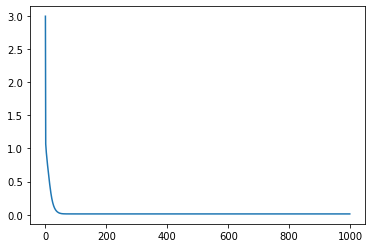

In [14]:
theta1, theta2 = NNLinearTrain(X_linear_train, y_linear_train, 1000, 0.1, 1)

In [15]:
hypothesis = NNLinearTest(X_linear_test, y_linear_test, y_linear_train, theta1, theta2)

Cost = 61.756659678308004
